In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os
drive.mount('/content/drive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


# Lectura de archivos

In [103]:
train=pd.read_csv('train_datathon.csv',sep=',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
test=pd.read_csv('test_datathon.csv',sep=',')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# Analisis exploratorio



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analisis de nulos (OJO)

In [6]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(train.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

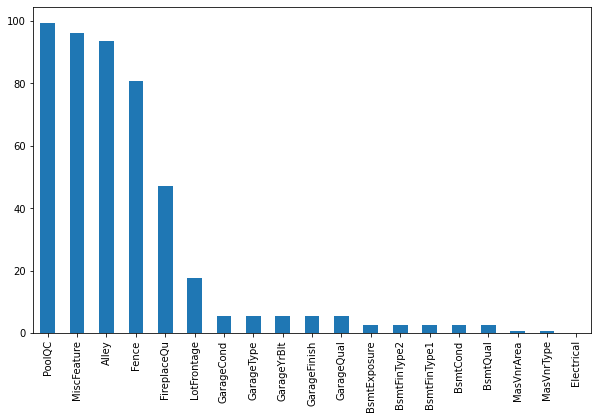

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [8]:
pip install missingno

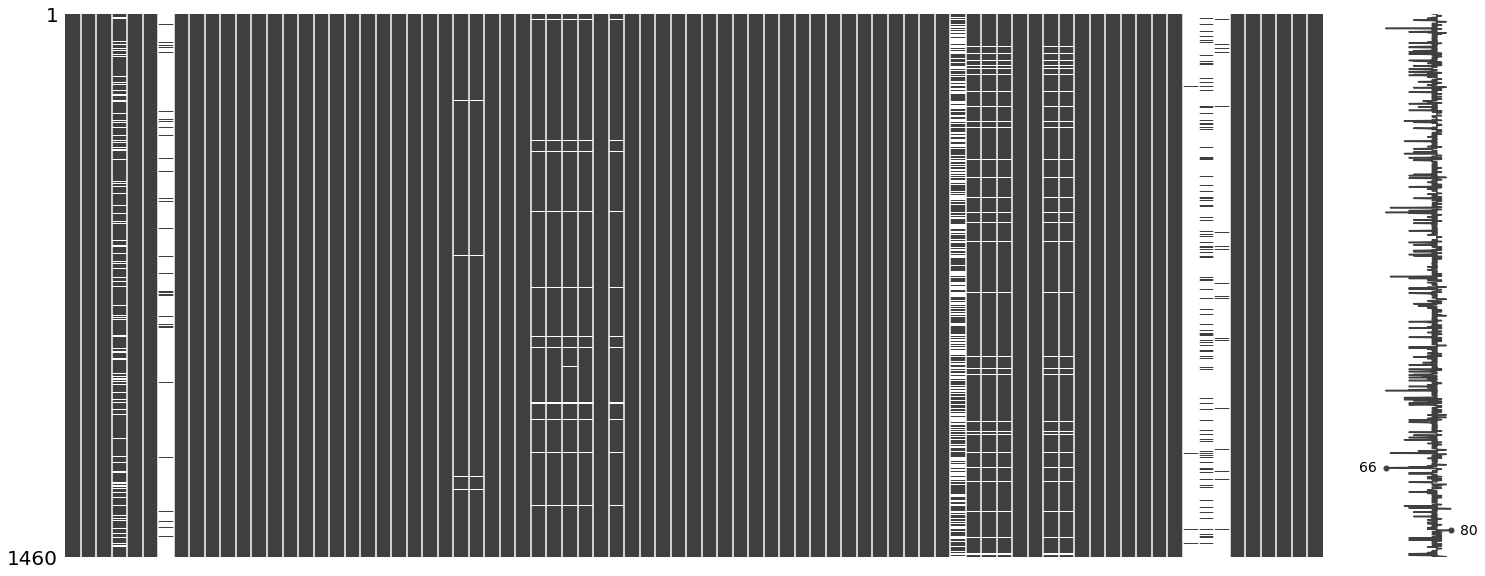

In [9]:
import missingno as msno
msno.matrix(train)

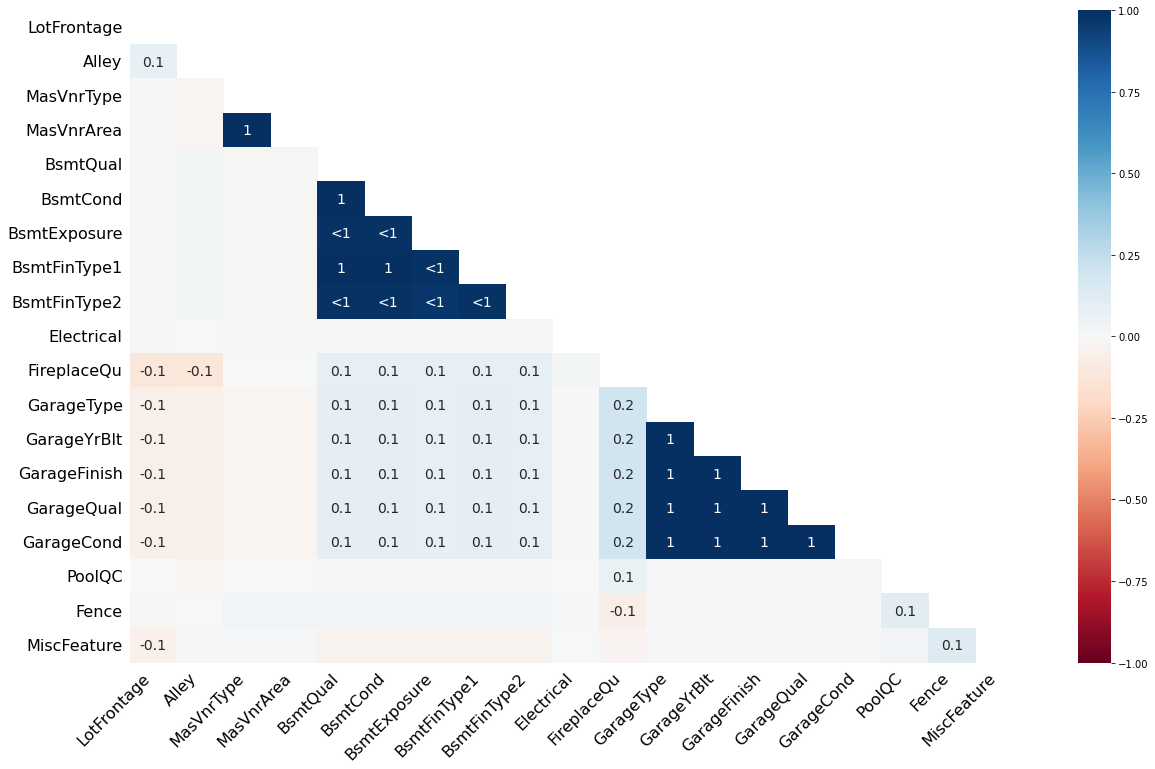

In [10]:
msno.heatmap(train)

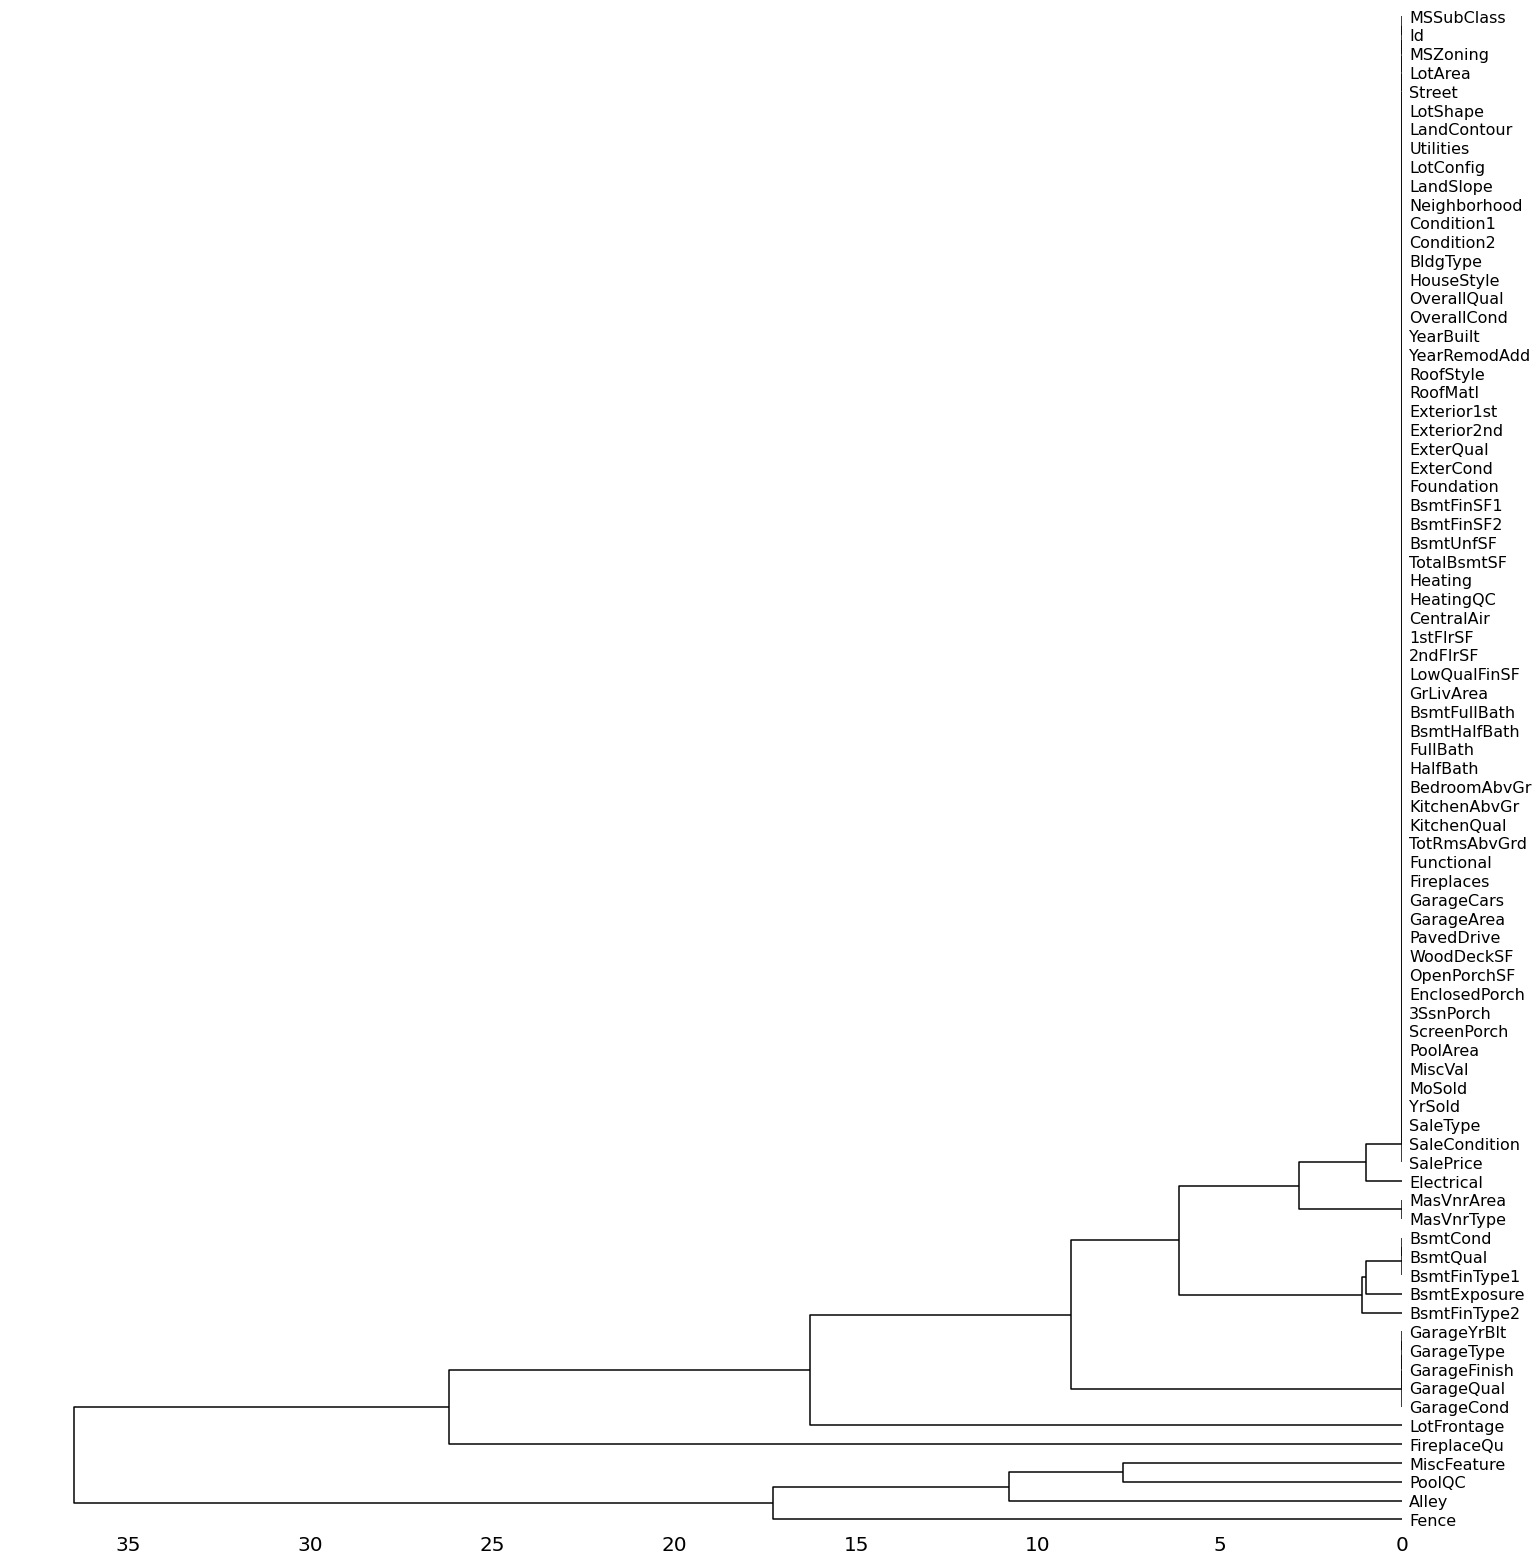

In [11]:
msno.dendrogram(train)

Comenzar a mirar las variables con mayor cantidad de nulos y explorar si tienen algo que aportar

In [12]:
train.PoolQC.value_counts() # Decision: borrar

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [13]:
train.MiscFeature.value_counts() # Decision: borrar

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [14]:
train.Alley.value_counts() # Decision: borrar

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
train.Fence.value_counts() # Decision: borrar

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [16]:
train.FireplaceQu.value_counts() # Decision: Con este se podria hacer otra tecnica en vez de borrar la columna

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
train.LotFrontage.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

259

In [18]:
train.GarageFinish.value_counts() # Decision: Alguna tecnica de reemplazo

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [19]:
train.GarageQual.value_counts() # Decision: Alguna tecnica de reemplazo

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [20]:
train.GarageCond.value_counts() # Decision: Reemplazar con alguna tecnica 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [21]:
train.GarageType.value_counts() # Decision: Reemplazar con alguna tecnica

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [22]:
train.BsmtExposure.value_counts() # Decision: Tecnica reemplazro

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
train.GarageYrBlt.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

81

In [24]:
train.BsmtFinType2.value_counts() # Decision: Tecnica reemplazro

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [25]:
train.BsmtFinType1.value_counts() # Decision: Tecnica reemplazro

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [26]:
train.BsmtCond.value_counts()# Decision: reemplzar moda

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
train.BsmtQual.value_counts()# Decision: reemplzar moda

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [28]:
train.MasVnrArea.isnull().sum()

8

In [29]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [30]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
train.shape

(1460, 81)

# Borrado de columnas

In [32]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] # Columnas a interpolar
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical'] # Columnas cateogoricas

In [33]:
# Borrar variables
train_x=train.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
train_x.columns # Verificando las columnas que quedaron

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [34]:
for i in col_inter: # reemplazar por la mediana en las columnas numericas en col_inter
  train_x[i] = train_x[i].fillna(train_x[i].median())

In [35]:
train_x.MasVnrArea.isnull().sum() # Verificar que funciono

0

In [36]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna('Desconocido') 

In [37]:
train_x.Electrical.isnull().sum() # Verificando que funciona

0

In [38]:
train_x.SaleCondition.dtype

dtype('O')

In [39]:
train_x.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Recodificar variables categoricas

In [40]:
alldata=[] # lista para guardar resultados de One hot Encoding
alldata1=[] # lista para guardar resultados de 
variables=[] # ir guardando las variables
for i in train_x.columns: # iterar sobre todas las columnas
  if train_x[i].dtype == 'O': # Quedarme con las que sean tipo object
    if len(train_x[i].unique()) ==2: # Si solo tienen dos categorias aplicar One Hot Encoding
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(train_x[i]) # Aplicar One Hot Encoding
      alldata.append(y) # ir agregando las columnas resultantes en alldata
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(train_x[i].unique()) >2: # Si las categorias tienen mas de 2 categorias aplicar LabelEncoder
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=train_x[i].astype('category').cat.codes # Aplicar Label Encoder
      alldata1.append(z) # Agregar a la lista alldata1
      variables.append(i) #
  if train_x[i].dtype == 'float64': # Si la columna es numerica entonces normalizar z score
    train_x[i]=(train_x[i]-train_x[i].mean())/(train_x[i].std()) # yapo
data_y=pd.concat(alldata, axis=1) # concatenar las columnas obtenidas One hot Encoding
data_z=pd.concat(alldata1, axis=1) # concatenar las columnas de Label Encoder
train_y= pd.concat([data_y,data_z,train_x],axis=1) # Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
train_y=train_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
train_y.head() # mostrar que quedo 

--------------------
Variable >2 categorias: MSZoning
Variable 2 categorias: Street
--------------------
--------------------
Variable >2 categorias: LotShape
--------------------
Variable >2 categorias: LandContour
Variable 2 categorias: Utilities
--------------------
--------------------
Variable >2 categorias: LotConfig
--------------------
Variable >2 categorias: LandSlope
--------------------
Variable >2 categorias: Neighborhood
--------------------
Variable >2 categorias: Condition1
--------------------
Variable >2 categorias: Condition2
--------------------
Variable >2 categorias: BldgType
--------------------
Variable >2 categorias: HouseStyle
--------------------
Variable >2 categorias: RoofStyle
--------------------
Variable >2 categorias: RoofMatl
--------------------
Variable >2 categorias: Exterior1st
--------------------
Variable >2 categorias: Exterior2nd
--------------------
Variable >2 categorias: MasVnrType
--------------------
Variable >2 categorias: ExterQual
------

,Grvl,Pave,AllPub,NoSeWa,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,1,0,0,1,60,-0.220799,8450,7,5,2003,2003,0.513928,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,1.017250,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0,1,1,0,0,1,20,0.460162,9600,6,8,1976,1976,-0.570555,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,-0.107890,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0,1,1,0,0,1,60,-0.084607,11250,7,5,2001,2002,0.325803,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,0.933906,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0,1,1,0,0,1,70,-0.447787,9550,7,5,1915,1970,-0.570555,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,0.808890,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0,1,1,0,0,1,60,0.641752,14260,8,5,2000,2000,1.366021,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,0.892234,3,836,192,84,0,0,0,0,0,12,2008,250000


In [41]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Grvl           1460 non-null   uint8  
 1   Pave           1460 non-null   uint8  
 2   AllPub         1460 non-null   uint8  
 3   NoSeWa         1460 non-null   uint8  
 4   N              1460 non-null   uint8  
 5   Y              1460 non-null   uint8  
 6   MSSubClass     1460 non-null   int64  
 7   LotFrontage    1460 non-null   float64
 8   LotArea        1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  MasVnrArea     1460 non-null   float64
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

# Definir entrenamiento y test 

In [42]:
# traigo estos modelos 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = train_y.drop(columns=['SalePrice']) # matriz de diseño
y = train_y.SalePrice # vector respuesta

In [43]:
X.head()

,Grvl,Pave,AllPub,NoSeWa,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,1,0,0,1,60,-0.220799,8450,7,5,2003,2003,0.513928,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,1.017250,2,548,0,61,0,0,0,0,0,2,2008
1,0,1,1,0,0,1,20,0.460162,9600,6,8,1976,1976,-0.570555,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,-0.107890,2,460,298,0,0,0,0,0,0,5,2007
2,0,1,1,0,0,1,60,-0.084607,11250,7,5,2001,2002,0.325803,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,0.933906,2,608,0,42,0,0,0,0,0,9,2008
3,0,1,1,0,0,1,70,-0.447787,9550,7,5,1915,1970,-0.570555,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,0.808890,3,642,0,35,272,0,0,0,0,2,2006
4,0,1,1,0,0,1,60,0.641752,14260,8,5,2000,2000,1.366021,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,0.892234,3,836,192,84,0,0,0,0,0,12,2008


In [44]:
#Separación en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 95% training and 5% test porque tengo un dataset de test aparte

# Modelo 1: AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=12,learning_rate=0.1, loss='linear',random_state=42)

In [46]:
#Fiteamos el modelo
model = ada.fit(X_train, y_train)

In [48]:
X_train.head()

,Grvl,Pave,AllPub,NoSeWa,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
176,0,1,1,0,0,1,60,1.231918,10029,6,5,1988,1989,0.912309,831,0,320,1151,1164,896,0,2060,0,1,2,1,4,1,8,1,0.392172,2,521,0,228,0,0,192,0,0,9,2007
221,0,1,1,0,0,1,60,-0.039210,8068,6,5,2002,2002,-0.570555,0,0,1010,1010,1010,1257,0,2267,0,0,2,1,4,1,8,1,0.975578,2,390,120,46,0,0,0,0,0,12,2009
294,0,1,1,0,0,1,20,0.460162,9600,6,5,1953,1953,0.746317,1285,0,131,1416,1644,0,0,1644,1,0,1,0,3,1,7,2,-1.066342,2,418,110,0,0,0,0,0,0,10,2009
813,0,1,1,0,0,1,20,0.233175,9750,6,6,1958,1958,0.773982,608,0,834,1442,1442,0,0,1442,0,0,1,1,4,1,7,0,-0.857983,1,301,0,0,275,0,0,0,500,4,2007
85,0,1,1,0,0,1,60,2.321457,16059,8,5,1991,1992,1.000838,0,0,1288,1288,1301,1116,0,2417,0,0,2,1,4,1,9,1,0.517187,2,462,127,82,0,0,0,0,0,4,2006


In [49]:
X_test.head()

,Grvl,Pave,AllPub,NoSeWa,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1092,0,1,1,0,0,1,50,-0.447787,8400,6,5,1925,1950,-0.570555,423,0,758,1181,1390,304,0,1694,0,0,2,0,4,1,7,1,-2.233154,2,576,342,0,128,0,0,0,0,6,2008
748,0,1,1,0,0,1,20,-0.493184,10593,7,5,1996,1996,1.299624,919,0,801,1720,1720,0,0,1720,1,0,2,0,3,1,7,1,0.725547,2,527,240,56,154,0,0,0,0,3,2010
430,0,1,1,0,0,1,160,-2.218286,1680,6,5,1971,1971,0.713118,387,0,96,483,483,504,0,987,0,0,1,1,2,1,4,0,-0.316249,1,264,0,0,0,0,0,0,0,7,2008
965,0,1,1,0,0,1,60,-0.220799,10237,6,5,2005,2007,-0.570555,0,0,783,783,783,701,0,1484,0,0,2,1,3,1,8,1,1.100593,2,393,0,72,0,0,0,0,0,7,2007
349,0,1,1,0,0,1,60,-0.629376,20431,9,5,2005,2006,4.243219,1410,0,438,1848,1848,880,0,2728,1,0,2,1,4,1,10,2,1.142265,3,706,0,0,0,0,0,0,0,4,2006


In [54]:
#Predicción!
y_pred = model.predict(X_test) # Sacar predicciones con test

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.7367893518145634
MSE:  1648289558.8257012
MAE:  21582.873793242165


# Modelo 2: GradientBoosting

In [57]:
#Ahora comparemos con GBM
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=50, subsample=0.8,max_depth=4,criterion='friedman_mse',
                               random_state=42)

In [58]:
#Fiteamos el modelo
model1 = gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [59]:
y_pred = model1.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.911749740054561
MSE:  552644746.838815
MAE:  9685.009492501253


# Modelo 3: LightGBM

In [61]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMRegressor(boosting_type='gbdt',max_depth=4,num_leaves=20,learning_rate=0.01,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.70613934811082
MSE:  1840227390.4868917
MAE:  20513.164854036193


# Modelo 4: XGBoost

In [63]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [64]:
#Fiteamos
regressor.fit(X_train, y_train)

[00:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [65]:
#Predecimos
y_pred = regressor.predict(X_test)

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.891122802621978
MSE:  681815682.1146731
MAE:  9738.4609375


# Ahora miremos que tan bien lo hace con el dataset que nos dieron

In [105]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Necesitamos aplicar la misma metodologia de limpieza que antes

In [106]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id']
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',\
            'GarageCars','GarageArea']
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical']
test_x=test.drop(labels=col_del, axis=1)
for i in col_inter:
  test_x[i] = test_x[i].fillna(test_x[i].median())
for i in col_cat:
  test_x[i] = test_x[i].fillna('Desconocido')
alldata=[]
alldata1=[]
variables=[]
for i in test_x.columns:
  if test_x[i].dtype == 'O':
    if len(test_x[i].unique()) ==2:
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(test_x[i])
      alldata.append(y)
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(test_x[i].unique()) >2:
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=test_x[i].astype('category').cat.codes
      alldata1.append(z)
      variables.append(i)
  if test_x[i].dtype == 'float64':
    test_x[i]=(test_x[i]-test_x[i].mean())/(test_x[i].std())
data_y=pd.concat(alldata, axis=1)
data_z=pd.concat(alldata1, axis=1)
test_y= pd.concat([data_y,data_z,test_x],axis=1) # Unir todos los datasets
test_y=test_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
test_y.head()

--------------------
Variable >2 categorias: MSZoning
Variable 2 categorias: Street
--------------------
--------------------
Variable >2 categorias: LotShape
--------------------
Variable >2 categorias: LandContour
Variable 2 categorias: Utilities
--------------------
--------------------
Variable >2 categorias: LotConfig
--------------------
Variable >2 categorias: LandSlope
--------------------
Variable >2 categorias: Neighborhood
--------------------
Variable >2 categorias: Condition1
--------------------
Variable >2 categorias: Condition2
--------------------
Variable >2 categorias: BldgType
--------------------
Variable >2 categorias: HouseStyle
--------------------
Variable >2 categorias: RoofStyle
--------------------
Variable >2 categorias: RoofMatl
--------------------
Variable >2 categorias: Exterior1st
--------------------
Variable >2 categorias: Exterior2nd
--------------------
Variable >2 categorias: MasVnrType
--------------------
Variable >2 categorias: ExterQual
------

,Grvl,Pave,AllPub,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,1,0,1,20,0.567135,11622,5,6,1961,1961,-0.563123,0.063406,0.517359,-0.650238,-0.370589,896,0,0,896,-0.817788,-0.258071,1,0,2,1,5,0,-0.652883,-0.987850,1.185515,140,0,0,0,120,0,0,6,2010
1,0,1,1,0,1,20,0.615752,14267,6,6,1958,1958,0.047040,1.063147,-0.297587,-0.339109,0.639011,1329,0,0,1329,-0.817788,-0.258071,1,1,3,1,6,0,-0.769542,-0.987850,-0.740981,393,36,0,0,0,0,12500,6,2010
2,0,1,1,0,1,60,0.275437,13830,5,5,1997,1998,-0.563123,0.773112,-0.297587,-0.954504,-0.266693,928,701,0,1629,-0.817788,-0.258071,2,1,3,1,6,1,0.747020,0.301303,0.042522,212,34,0,0,0,0,0,3,2010
3,0,1,1,0,1,60,0.469903,9978,6,6,1998,1998,-0.450130,0.357835,-0.297587,-0.526701,-0.271210,926,678,0,1604,-0.817788,-0.258071,2,1,3,1,7,1,0.785906,0.301303,-0.012784,360,36,0,0,0,0,0,6,2010
4,0,1,1,0,1,120,-1.231670,5005,8,5,1992,1992,-0.563123,-0.387027,-0.297587,1.058685,0.528339,1280,0,0,1280,-0.817788,-0.258071,2,0,2,1,5,0,0.552589,0.301303,0.153134,0,82,0,0,144,0,0,1,2010


In [107]:
test_y.isna().sum()

Grvl             0
Pave             0
AllPub           0
N                0
Y                0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [108]:
len(test_y.columns)

41

In [111]:
len(X_test.columns)

42

In [110]:
test_y.columns

Index(['Grvl', 'Pave', 'AllPub', 'N', 'Y', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [112]:
X_test.columns

Index(['Grvl', 'Pave', 'AllPub', 'NoSeWa', 'N', 'Y', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [115]:
X_test.NoSeWa.value_counts() # Todo es cero entonces podemos crear una igual

0    292
Name: NoSeWa, dtype: int64

In [117]:
test_y['NoSeWa']=0
test_y.head()

,Grvl,Pave,AllPub,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NoSeWa
0,0,1,1,0,1,20,0.567135,11622,5,6,1961,1961,-0.563123,0.063406,0.517359,-0.650238,-0.370589,896,0,0,896,-0.817788,-0.258071,1,0,2,1,5,0,-0.652883,-0.987850,1.185515,140,0,0,0,120,0,0,6,2010,0
1,0,1,1,0,1,20,0.615752,14267,6,6,1958,1958,0.047040,1.063147,-0.297587,-0.339109,0.639011,1329,0,0,1329,-0.817788,-0.258071,1,1,3,1,6,0,-0.769542,-0.987850,-0.740981,393,36,0,0,0,0,12500,6,2010,0
2,0,1,1,0,1,60,0.275437,13830,5,5,1997,1998,-0.563123,0.773112,-0.297587,-0.954504,-0.266693,928,701,0,1629,-0.817788,-0.258071,2,1,3,1,6,1,0.747020,0.301303,0.042522,212,34,0,0,0,0,0,3,2010,0
3,0,1,1,0,1,60,0.469903,9978,6,6,1998,1998,-0.450130,0.357835,-0.297587,-0.526701,-0.271210,926,678,0,1604,-0.817788,-0.258071,2,1,3,1,7,1,0.785906,0.301303,-0.012784,360,36,0,0,0,0,0,6,2010,0
4,0,1,1,0,1,120,-1.231670,5005,8,5,1992,1992,-0.563123,-0.387027,-0.297587,1.058685,0.528339,1280,0,0,1280,-0.817788,-0.258071,2,0,2,1,5,0,0.552589,0.301303,0.153134,0,82,0,0,144,0,0,1,2010,0


In [118]:
interseccion = list(set(test_y.columns) & set(X_test.columns))
len(interseccion)
union = list(set(test_y.columns) | set(X_test.columns))
set(test_y.columns) ^ set(X_test.columns) # Esta columna tiene un problema y nos cambia la dimension del dataset original

set()

In [125]:
# Predecimos con GradientBoosting
y_pred = model.predict(test_y)
y_pred
df= pd.DataFrame()
df['Id']= test_y.index
df['Prediccion_Adaboost']= y_pred
y_pred1=gbrt.predict(test_y)
df['Prediccion_GradientBoosting']= y_pred1
y_pred2=clf.predict(test_y)
df['Prediccion_LightGBM']= y_pred2
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,Id,Prediccion_Adaboost,Prediccion_GradientBoosting,Prediccion_LightGBM
0,0,124989.680288,102220.681189,139929.143521
1,1,124989.680288,127633.610369,153849.447869
2,2,124989.680288,117111.617785,141688.350363
3,3,124989.680288,120649.428563,145765.584356
4,4,124989.680288,131458.061514,151059.186036
